In [1]:
all_fuzzers = ['afl', 'aflfast', 'aflplusplus', 'aflsmart', 'eclipser', 'entropic', 'fairfuzz', 'honggfuzz', 'lafintel', 'libfuzzer', 'mopt']
all_targets = ['bloaty_fuzz_target', 'curl_curl_fuzzer_http', 'freetype2-2017', 'harfbuzz-1.3.2', 'jsoncpp_jsoncpp_fuzzer', 'lcms-2017-03-21', 'libjpeg-turbo-07-2017', 'libpcap_fuzz_both', 'libpng-1.2.56', 'libxml2-v2.9.2', 'libxslt_xpath', 'mbedtls_fuzz_dtlsclient', 'openssl_x509', 'openthread-2019-12-23', 'php_php-fuzz-parser', 'proj4-2017-08-14', 're2-2014-12-09', 'sqlite3_ossfuzz', 'systemd_fuzz-link-parser', 'vorbis-2017-12-11', 'woff2-2016-05-06', 'zlib_zlib_uncompress_fuzzer']


In [2]:
# Run this only if you downloaded the data yourself. 
# Else skip to the next code cell plz!!

import pandas as pd
import numpy as np

has_source = False
if has_source:
    df1 = pd.read_csv("./0411.csv")
    df2 = pd.read_csv("./0423-2.csv")
    df3 = pd.read_csv("./0423.csv")
    df4 = pd.read_csv("./0426.csv")
    df5 = pd.read_csv("./0502.csv")
    df6 = pd.read_csv("./0525.csv")
    df7 = pd.read_csv("./0529.csv")
    df8 = pd.read_csv("./0601.csv")
    df9 = pd.read_csv("./0602.csv")
    
    df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], ignore_index=True)
    df = df[df['time'] == 82800]
    df = df[df['fuzzer'].isin(all_fuzzers)]
    df.to_csv('df.csv')

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('df.csv')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for the specific benchmark

def plot(target):
    df_bloaty = df[df["benchmark"] == target]
    
    # Plot using seaborn
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df_bloaty,
        x="fuzzer",
        y="edges_covered",
        hue="experiment"
    )
    
    plt.title("Edges Covered by Fuzzer on {}".format(target))
    plt.xlabel("Fuzzer")
    plt.ylabel("Edges Covered")
    plt.legend(title="Experiment", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

for target in all_targets:
    pass
    #plot(target)

In [5]:
summary_stats = df.groupby(["fuzzer", "benchmark"])["edges_covered"].agg(
    n="size",
    average="mean",
    stddev="std"
).reset_index()

# Calculate Coefficient of Variation (CV = stddev / mean)
summary_stats["cv"] = summary_stats["stddev"] / summary_stats["average"]
print(summary_stats["n"].min())
print(summary_stats["n"].max())
print(summary_stats)
summary_stats.to_csv('cv.csv')

106
154
    fuzzer                    benchmark    n       average      stddev  \
0      afl           bloaty_fuzz_target  143   8358.097902  372.116147   
1      afl        curl_curl_fuzzer_http  148  17624.000000   62.726271   
2      afl               freetype2-2017  147  20623.190476  266.175021   
3      afl               harfbuzz-1.3.2  148   8401.601351   89.132000   
4      afl       jsoncpp_jsoncpp_fuzzer  151    638.397351    0.517423   
..     ...                          ...  ...           ...         ...   
237   mopt              sqlite3_ossfuzz  130  34981.700000  421.026627   
238   mopt     systemd_fuzz-link-parser  148    639.898649    0.302818   
239   mopt            vorbis-2017-12-11  149   2168.389262    6.153126   
240   mopt             woff2-2016-05-06  148   1859.310811   15.326315   
241   mopt  zlib_zlib_uncompress_fuzzer  146    961.349315    6.801209   

           cv  
0    0.044522  
1    0.003559  
2    0.012907  
3    0.010609  
4    0.000811  
..     

{'afl': array([0.12156863, 0.46666667, 0.70588235, 1.        ]), 'aflfast': array([1.        , 0.49803922, 0.05490196, 1.        ]), 'aflplusplus': array([0.17254902, 0.62745098, 0.17254902, 1.        ]), 'aflsmart': array([0.83921569, 0.15294118, 0.15686275, 1.        ]), 'eclipser': array([0.58039216, 0.40392157, 0.74117647, 1.        ]), 'entropic': array([0.54901961, 0.3372549 , 0.29411765, 1.        ]), 'fairfuzz': array([0.89019608, 0.46666667, 0.76078431, 1.        ]), 'honggfuzz': array([0.49803922, 0.49803922, 0.49803922, 1.        ]), 'lafintel': array([0.7372549 , 0.74117647, 0.13333333, 1.        ]), 'libfuzzer': array([0.09019608, 0.74509804, 0.81176471, 1.        ]), 'mopt': array([0.61960784, 0.85490196, 0.89803922, 1.        ])}
       Unnamed: 0.1  Unnamed: 0                                  git_hash  \
0                91      207626  69b67c0b4145a78865af502d4143504f9126cc9b   
1               196      213563  69b67c0b4145a78865af502d4143504f9126cc9b   
2             

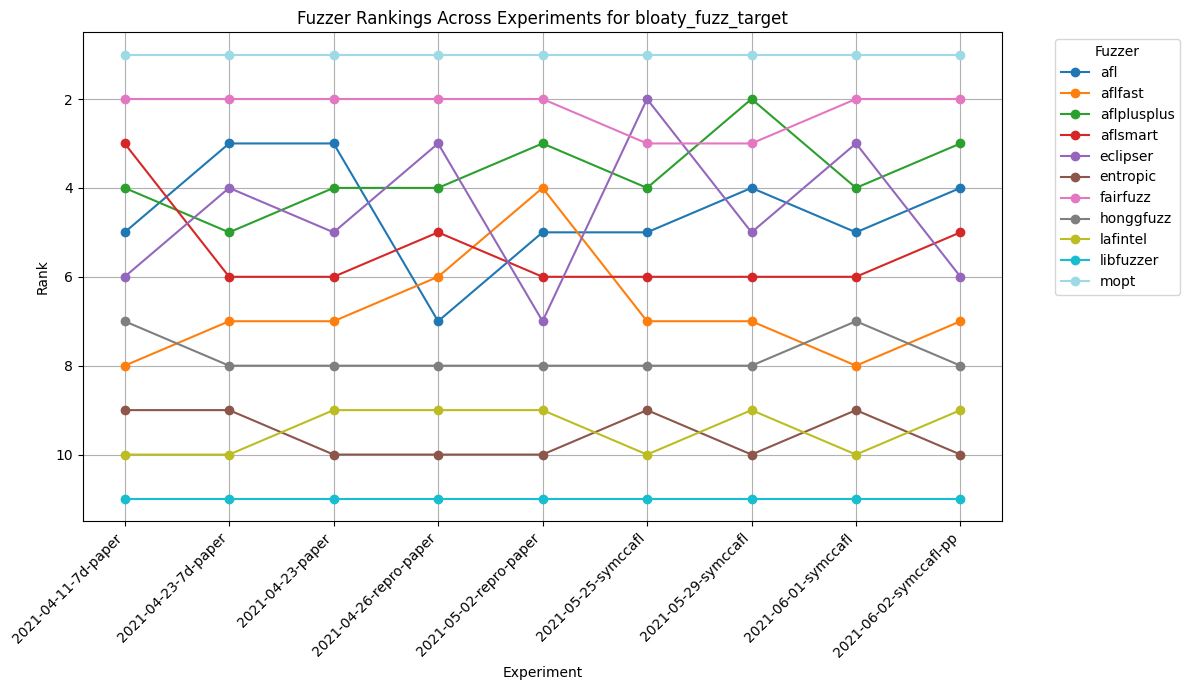

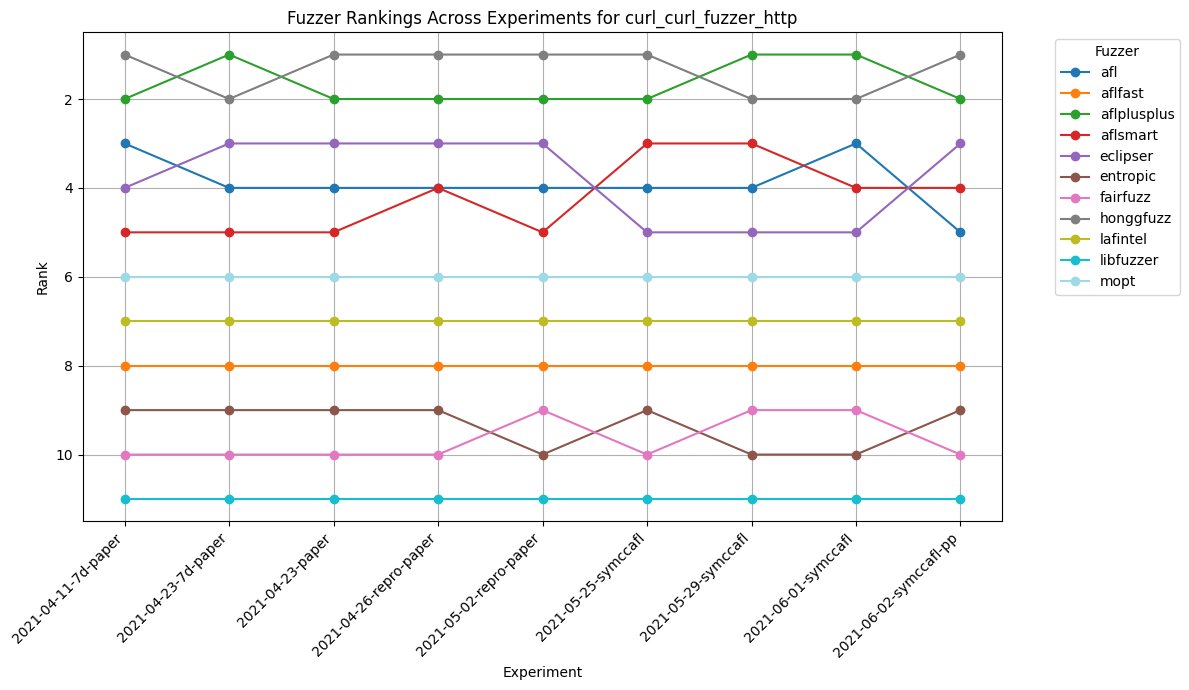

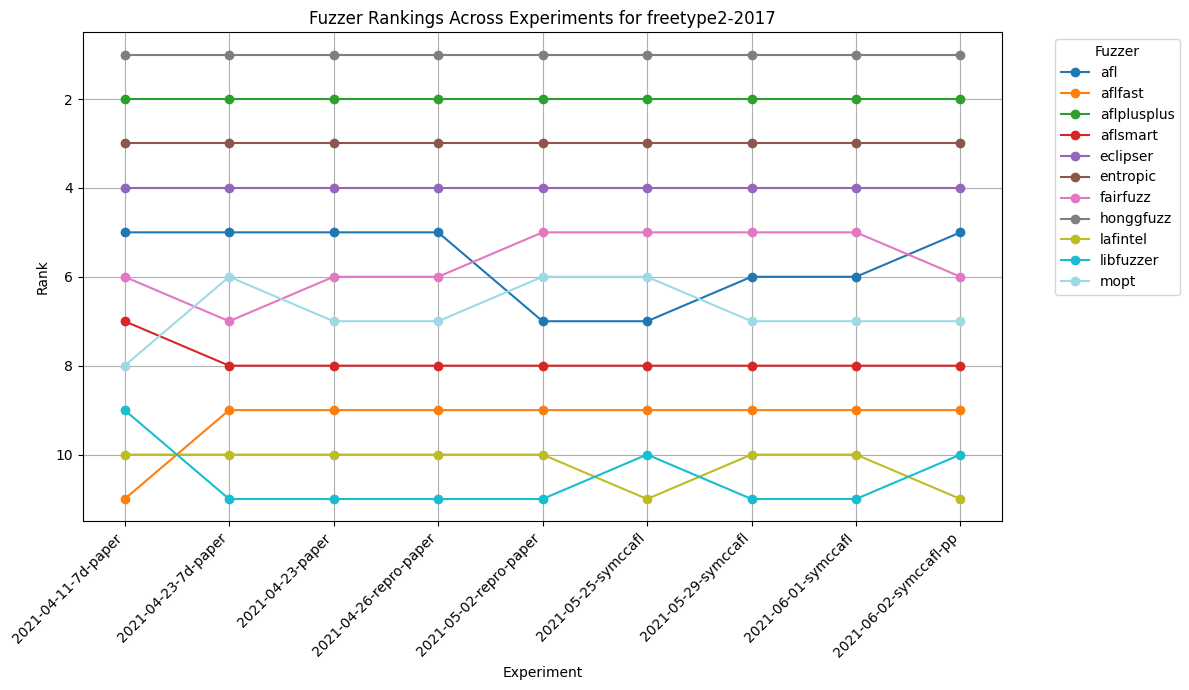

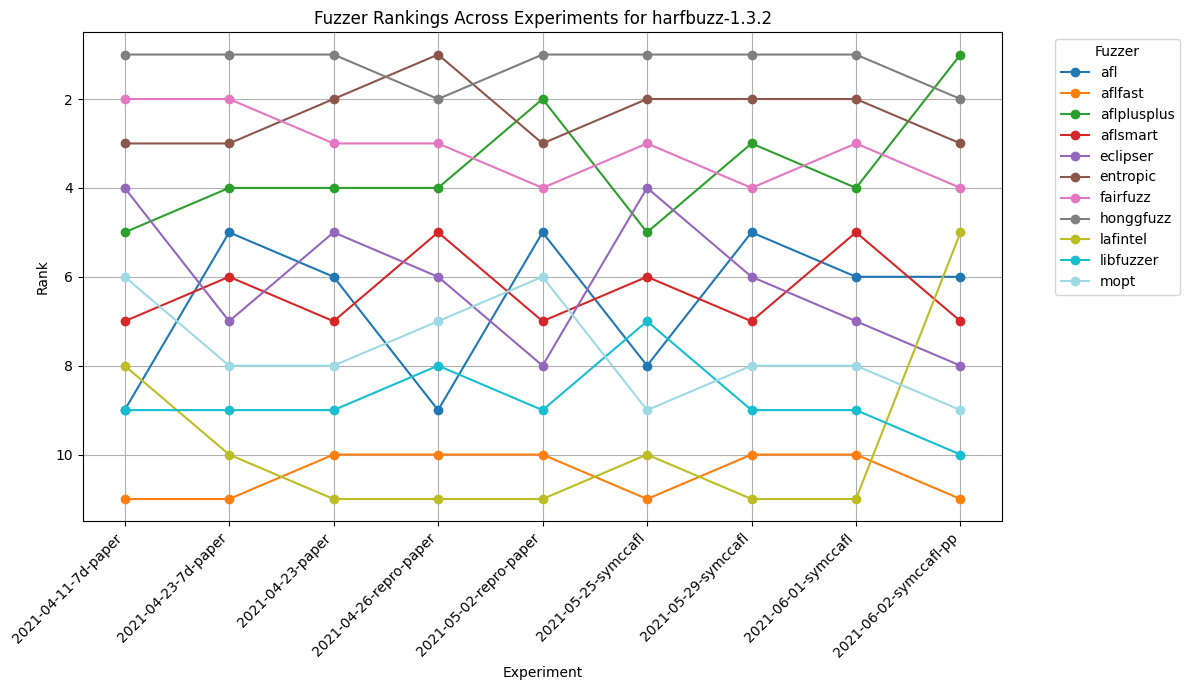

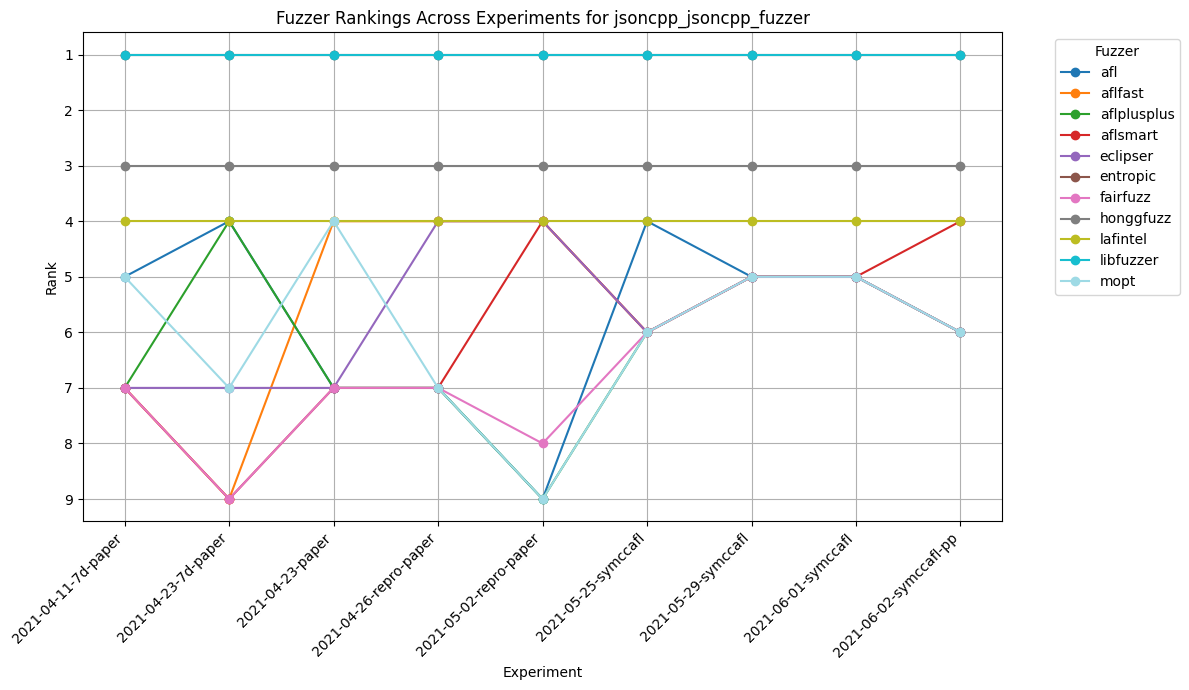

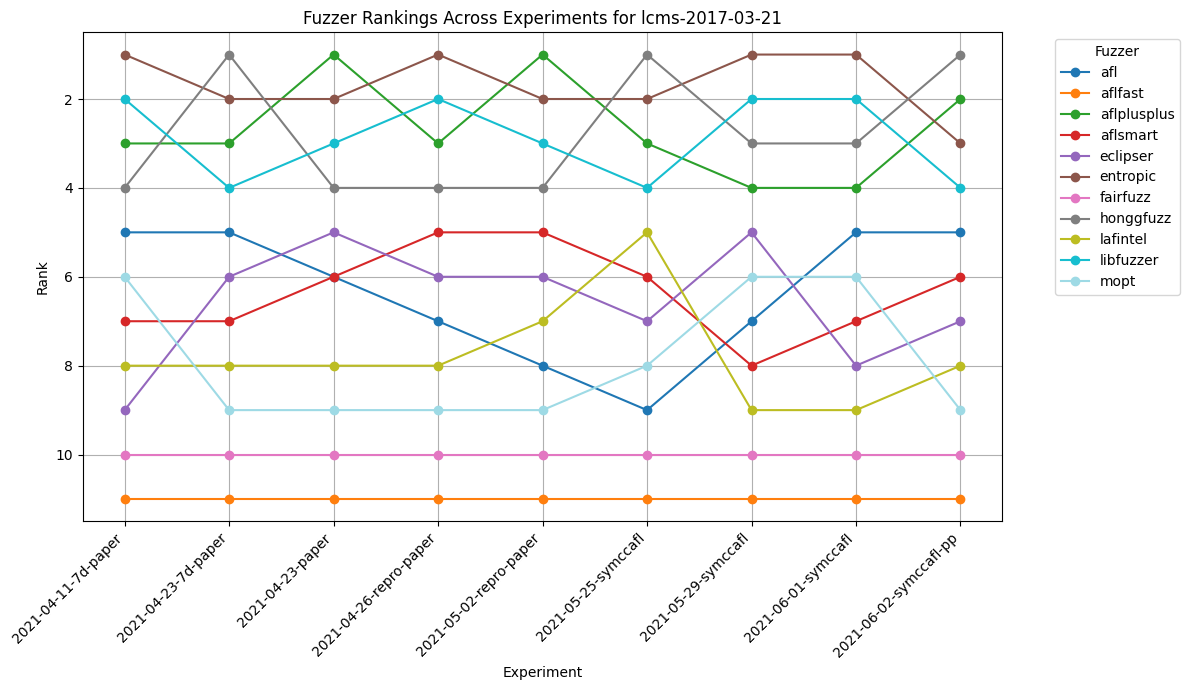

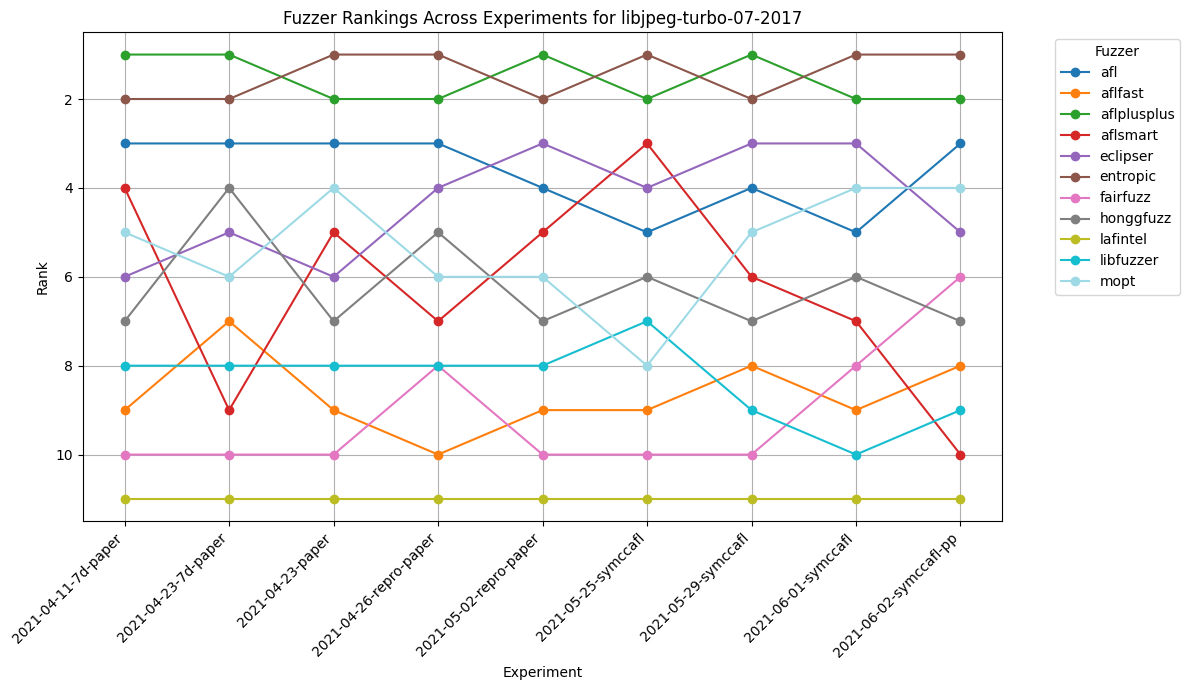

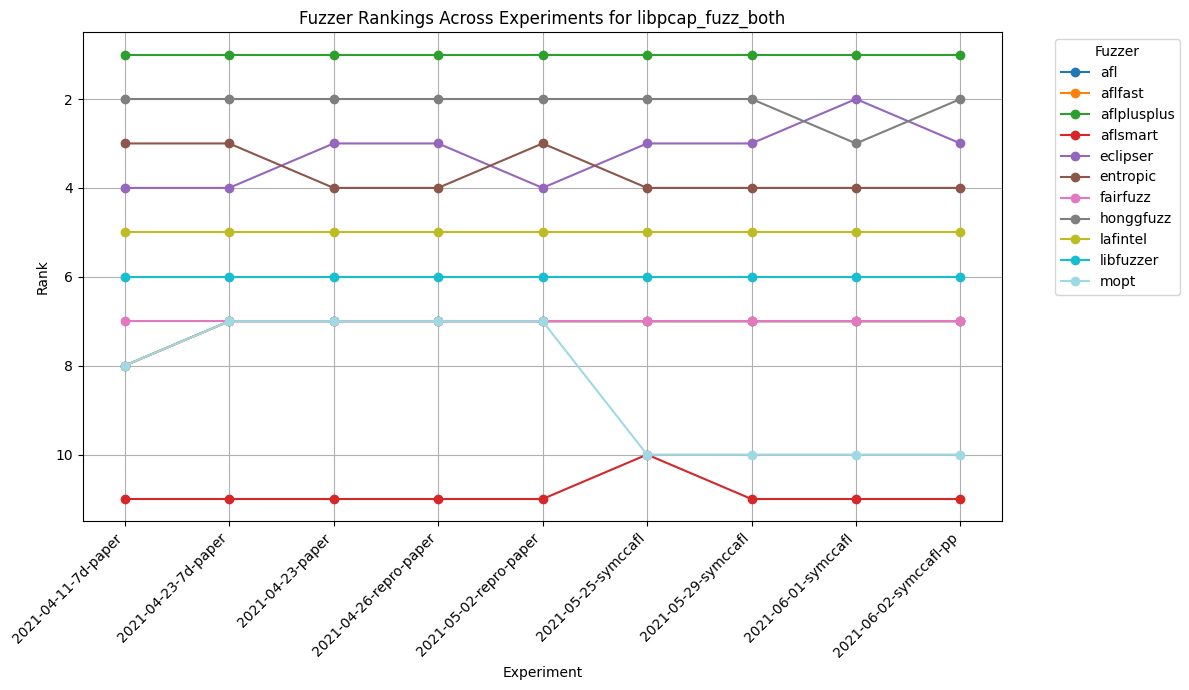

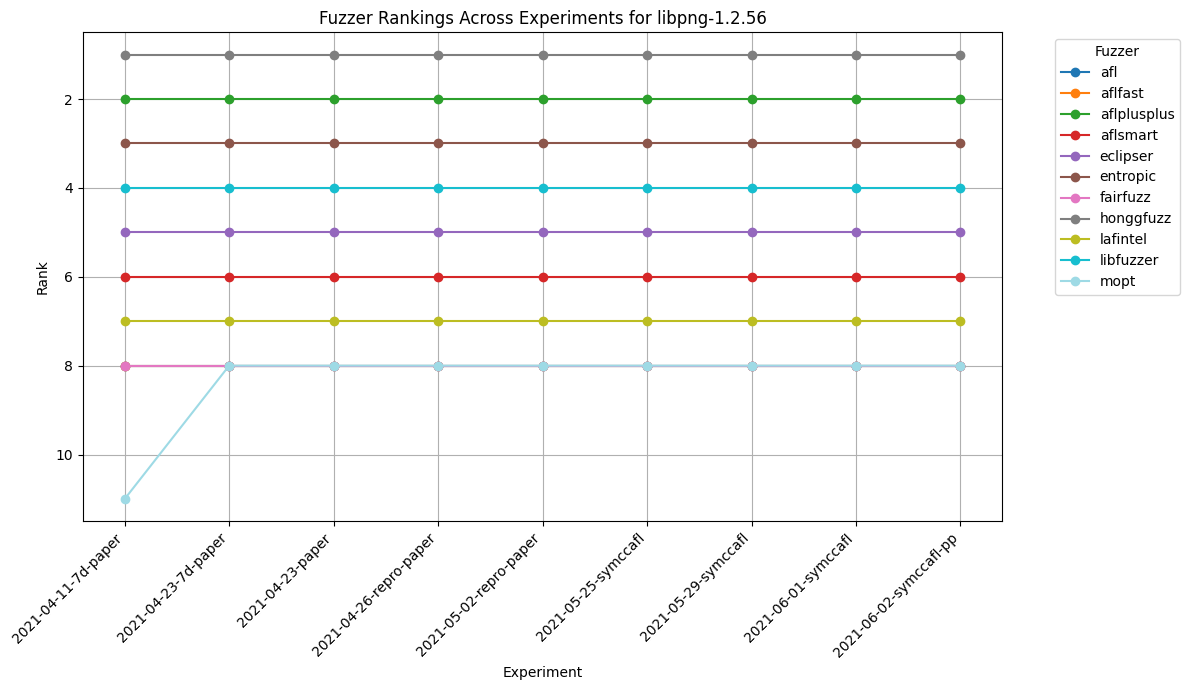

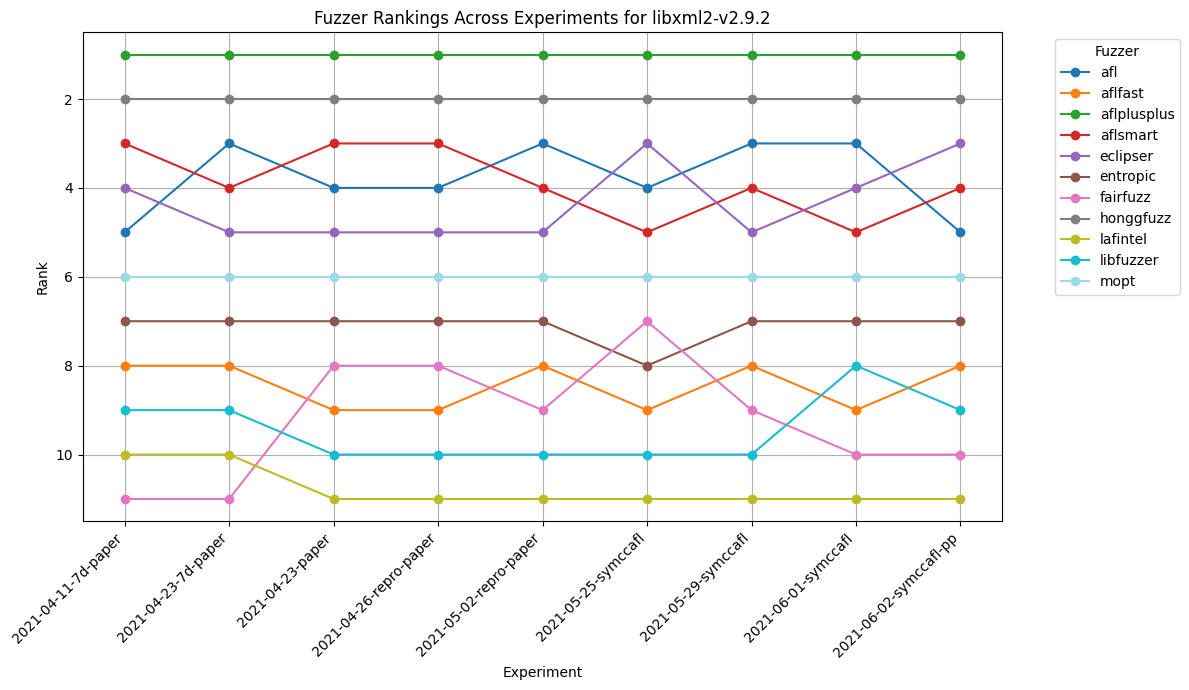

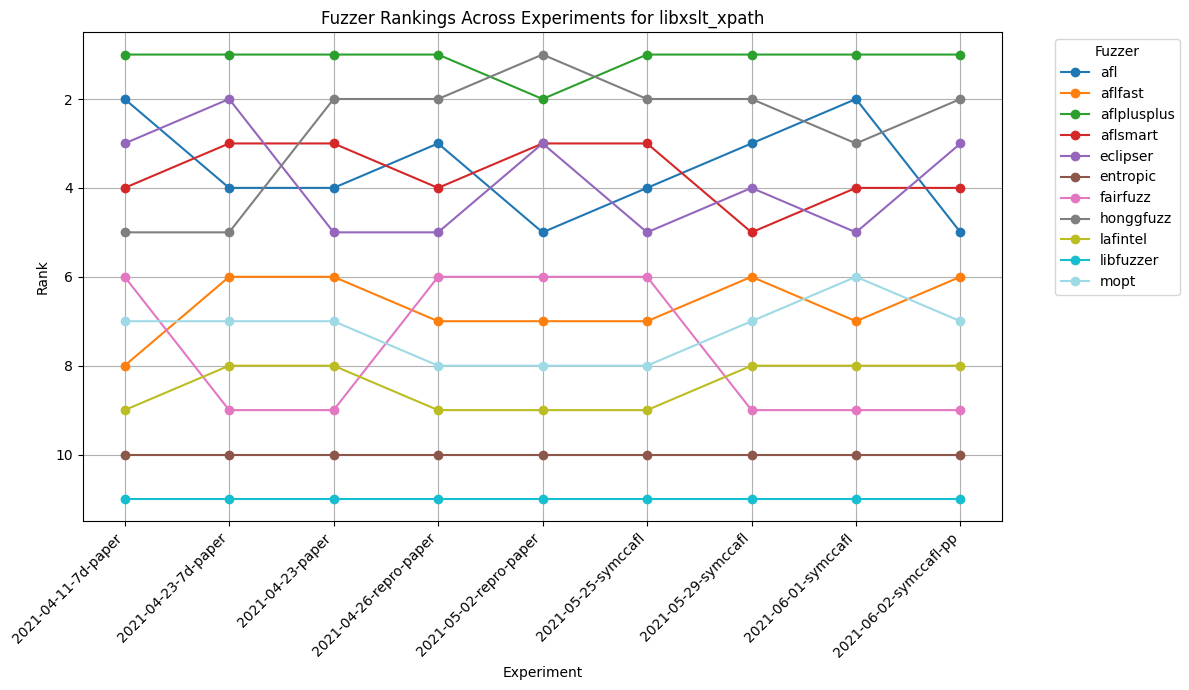

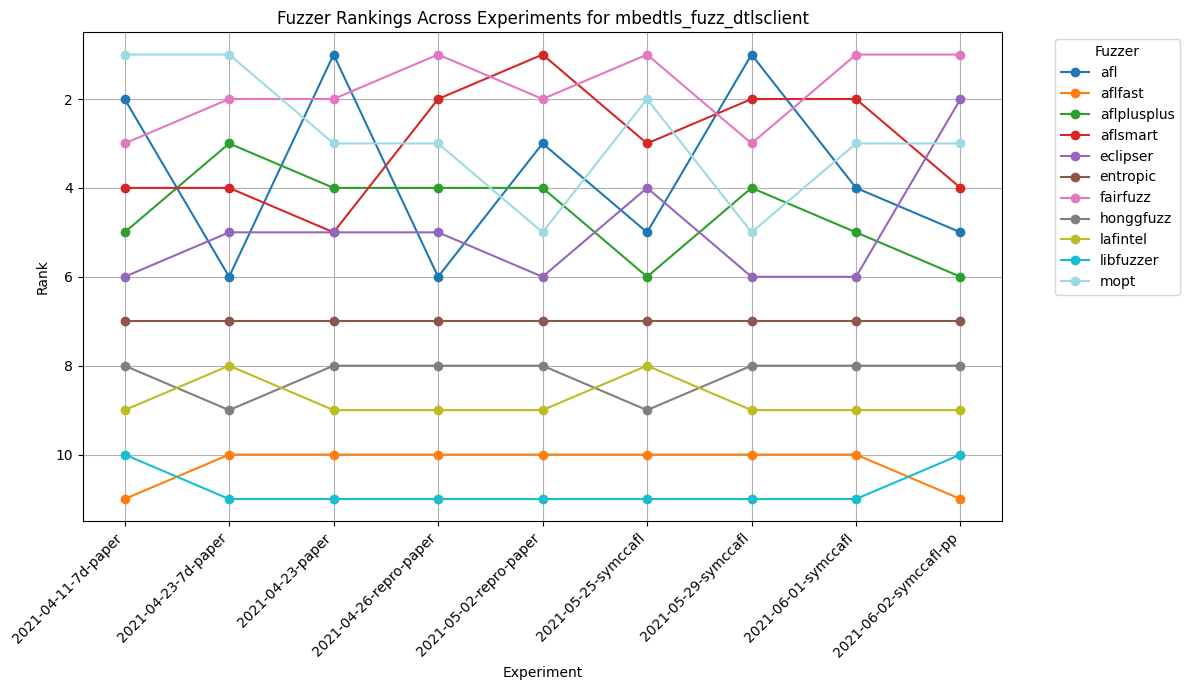

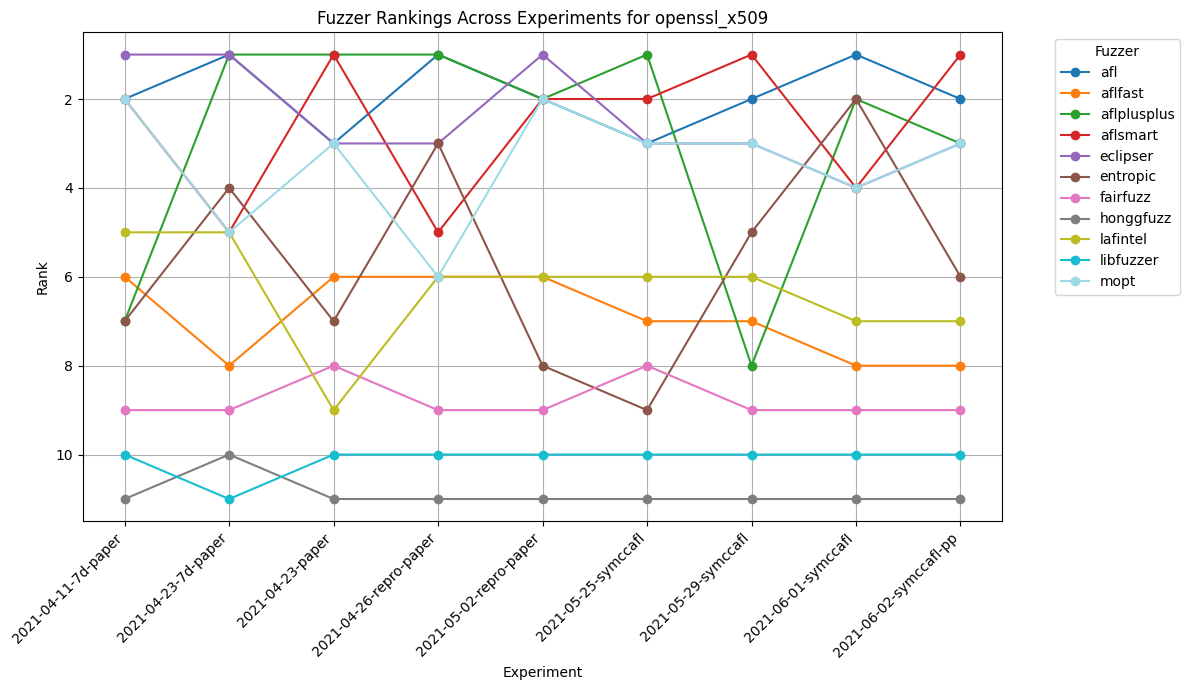

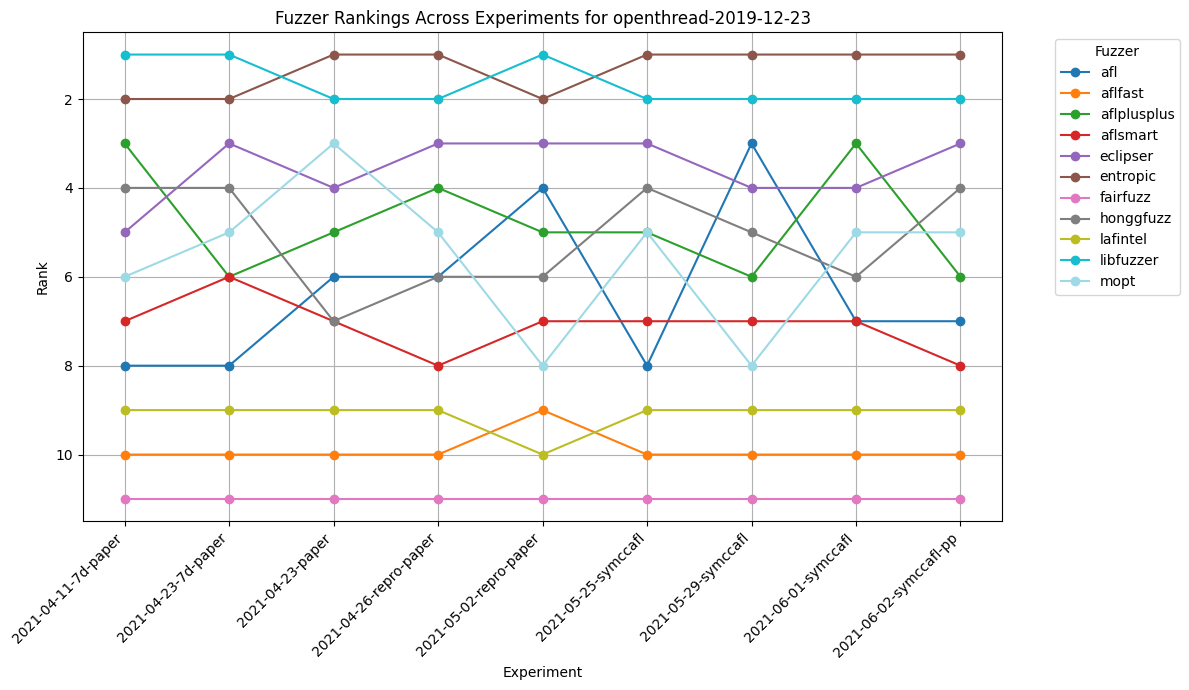

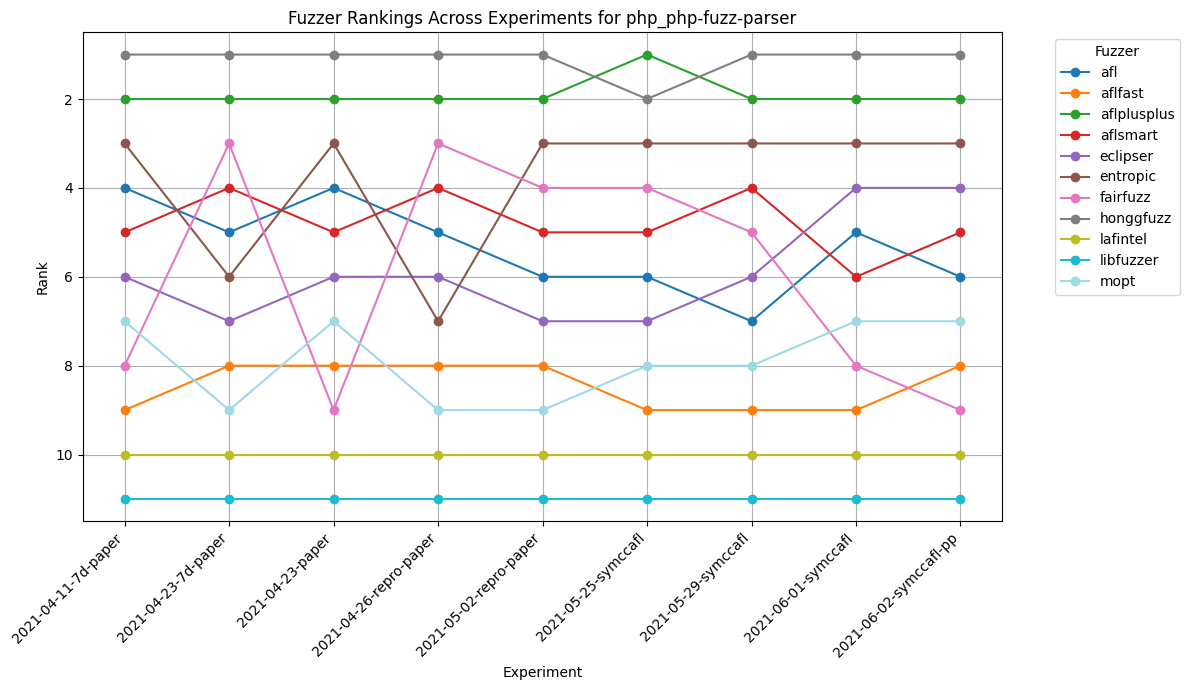

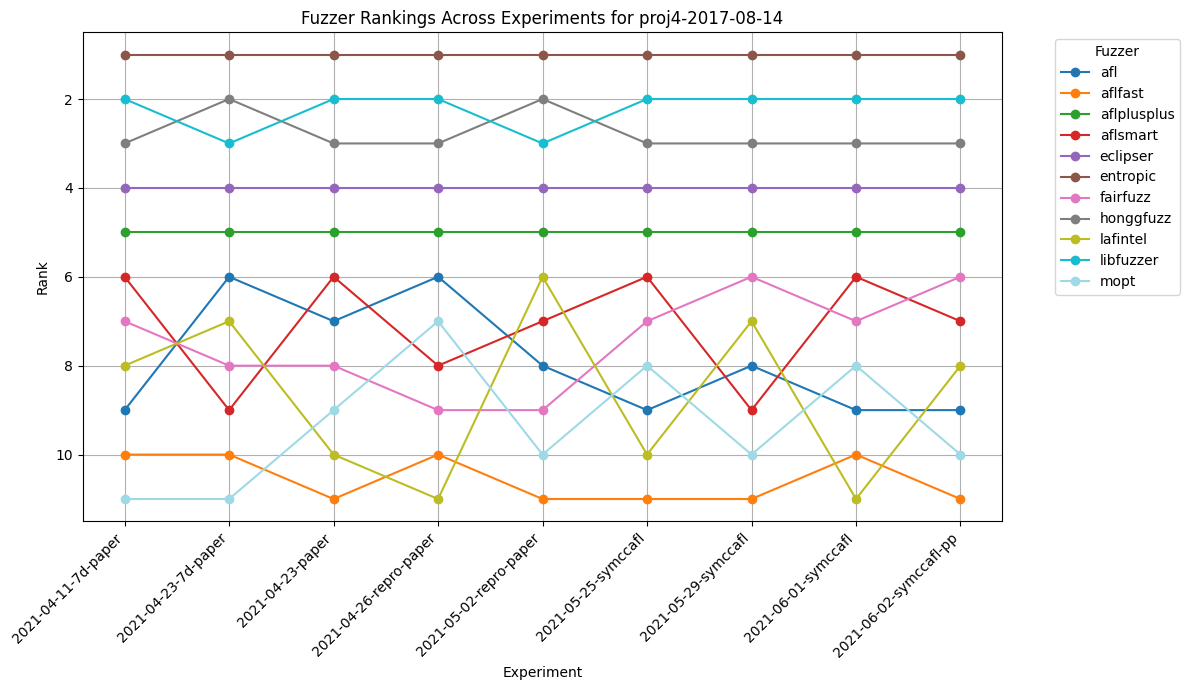

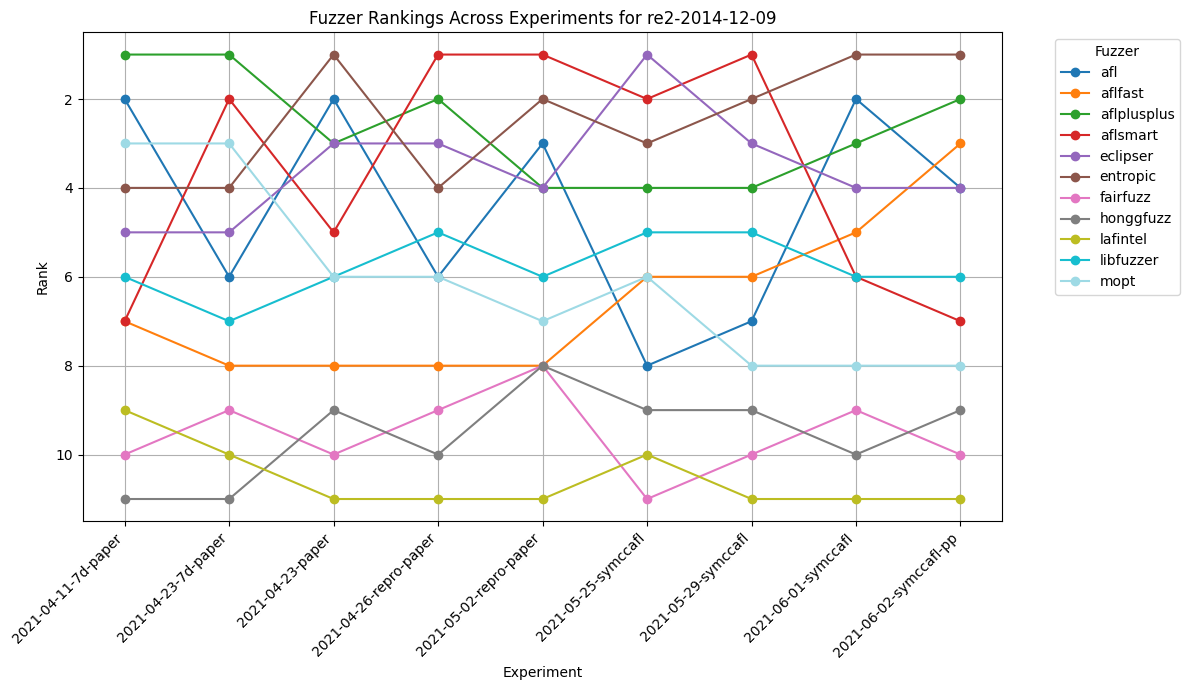

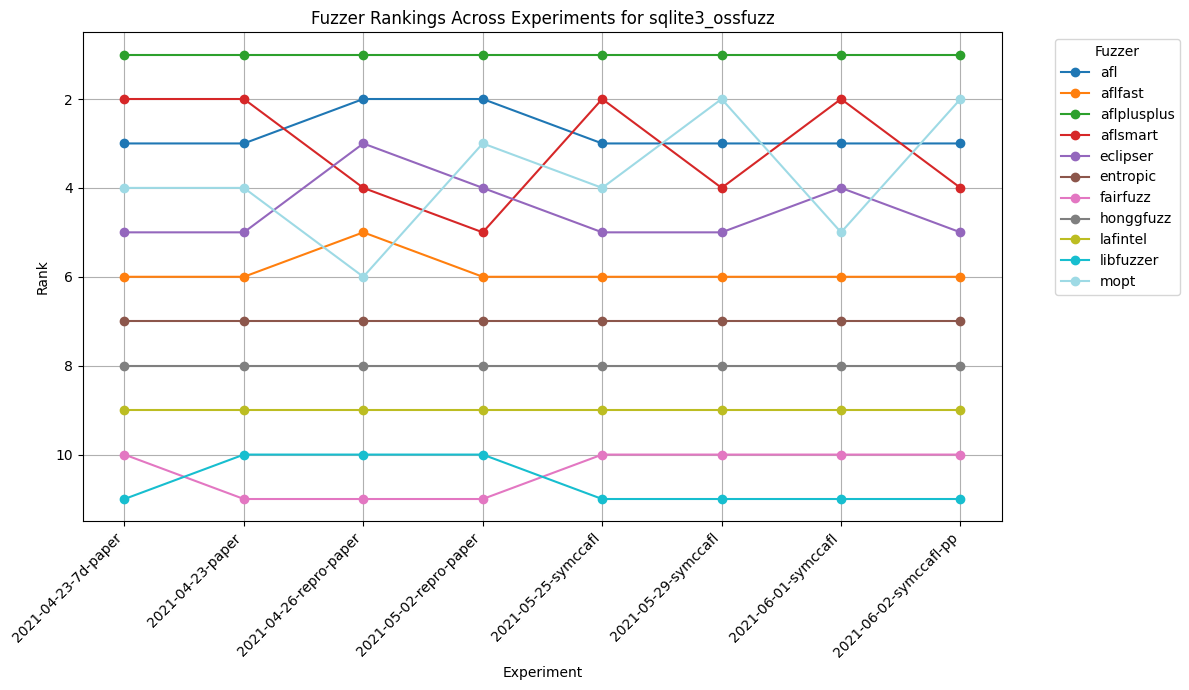

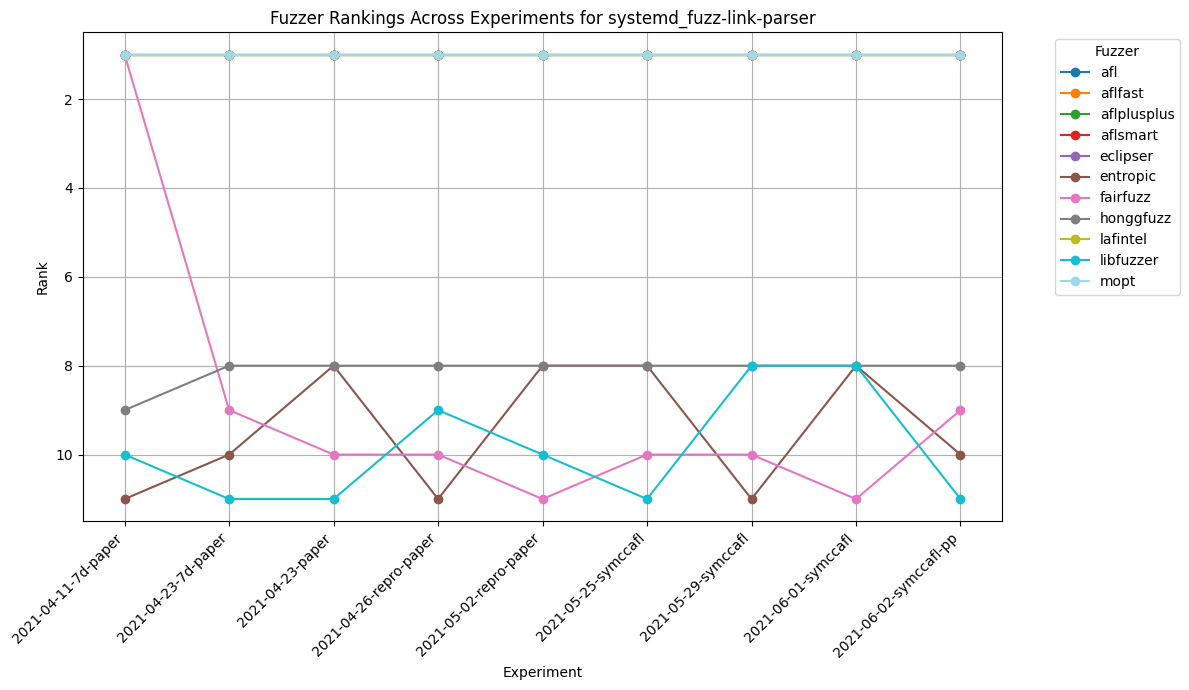

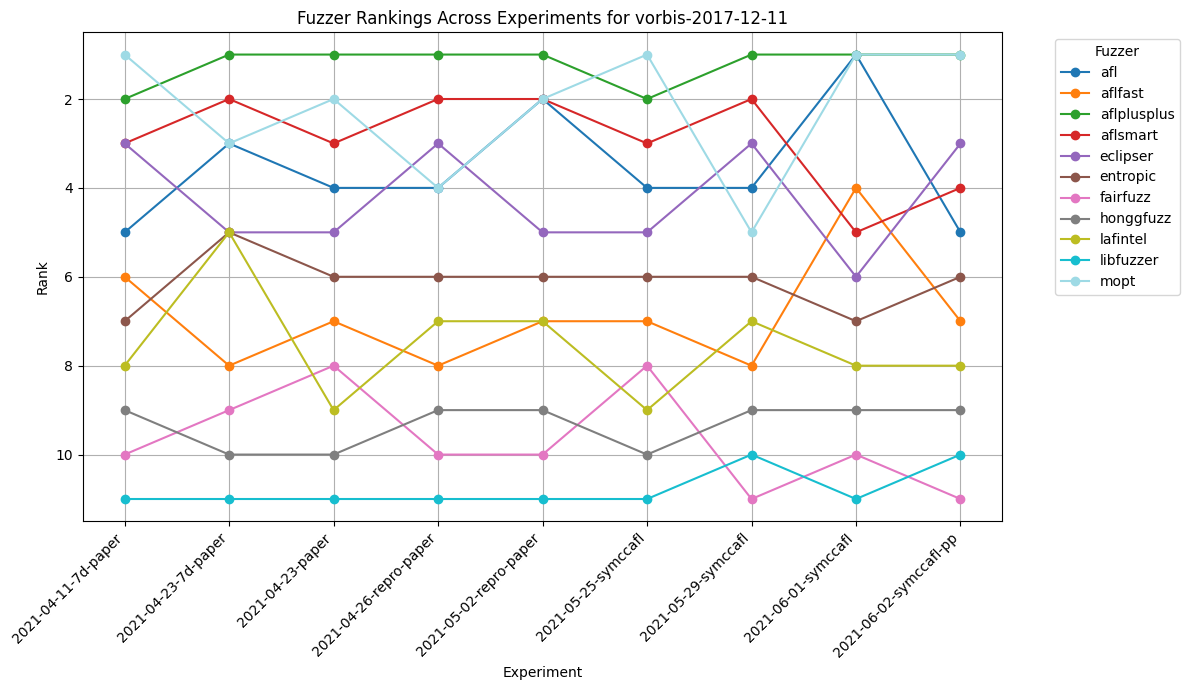

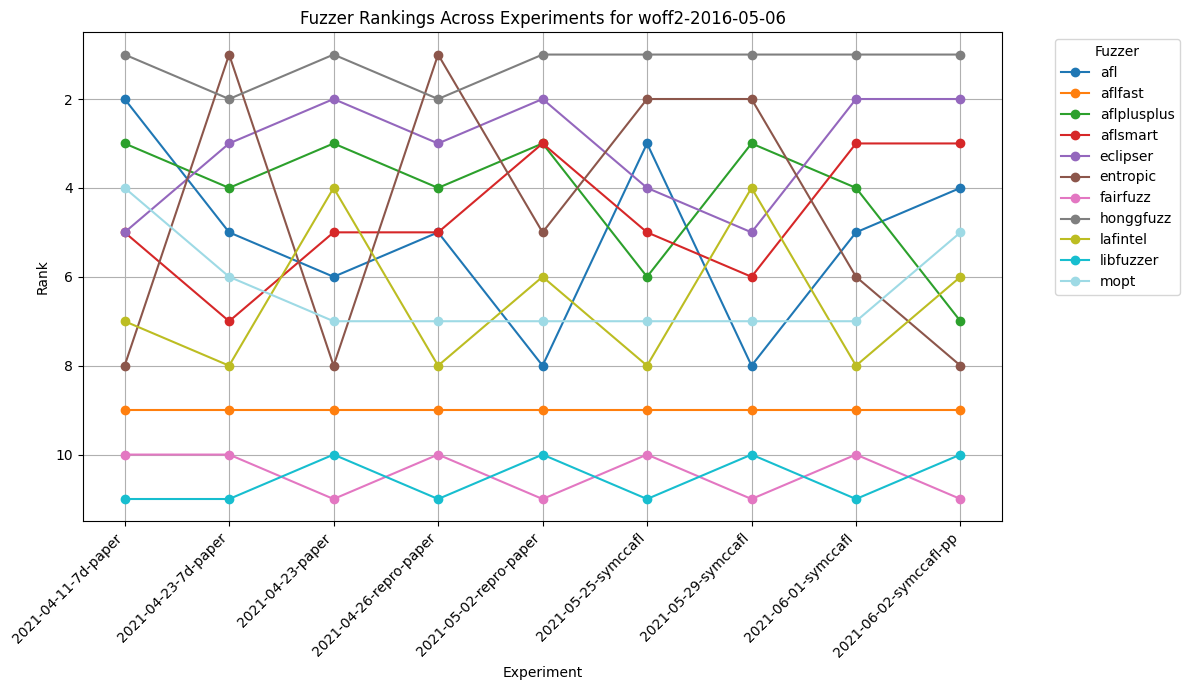

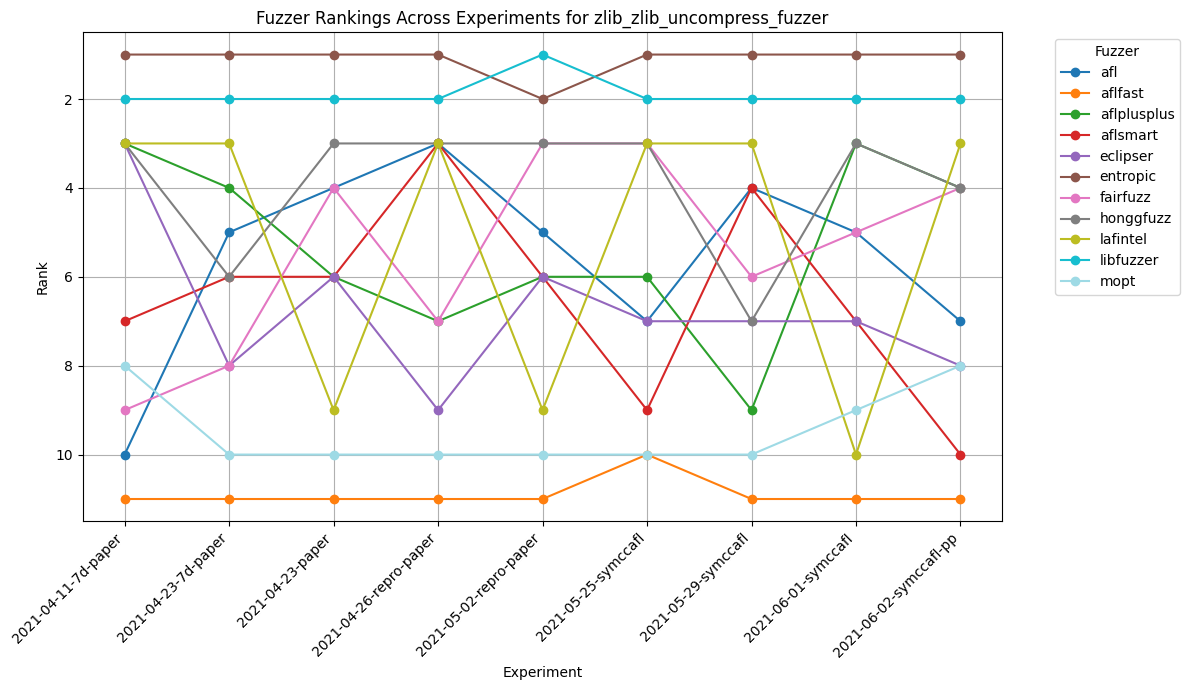

In [6]:
colors = plt.cm.tab20(np.linspace(0, 1, len(all_fuzzers)))
color_map = dict(zip(all_fuzzers, colors))
print(color_map)
print(df)
def graph(target):
    selected = df[df["benchmark"] == target]
    # Create the plot
    plt.figure(figsize=(12, 7))
    median_edges = (
        selected.groupby(['experiment', 'fuzzer'])['edges_covered']
        .median()
        .reset_index()
        .rename(columns={'edges_covered': 'median_edges_covered'})
    )
    median_edges['rank'] = (
        median_edges.groupby('experiment')['median_edges_covered']
        .rank(ascending=False, method='min')
    )

    median_edges_sorted = median_edges.sort_values('experiment')
    # Plot each fuzzer's rank line
    for fuzzer in median_edges_sorted['fuzzer'].unique():
        subset = median_edges_sorted[median_edges_sorted['fuzzer'] == fuzzer]
        plt.plot(subset['experiment'], subset['rank'], marker='o', label=fuzzer, color=color_map[fuzzer])

    # Plot formatting
    plt.title("Fuzzer Rankings Across Experiments for {}".format(target))
    plt.xlabel("Experiment")
    plt.ylabel("Rank")
    plt.xticks(rotation=45, ha='right')
    plt.gca().invert_yaxis()  # Lower rank is better
    plt.grid(True)
    plt.legend(title="Fuzzer", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
for target in all_targets:
    graph(target)

/tmp/ipykernel_24932/2965174180.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([0,2,4,6,8,10], fontsize = 16)
/tmp/ipykernel_24932/2965174180.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([0,2,4,6,8,10], fontsize = 16)
/tmp/ipykernel_24932/2965174180.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([0,2,4,6,8,10], fontsize = 16)
/tmp/ipykernel_24932/2965174180.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([0,2,4,6,8,10], fontsize = 16)


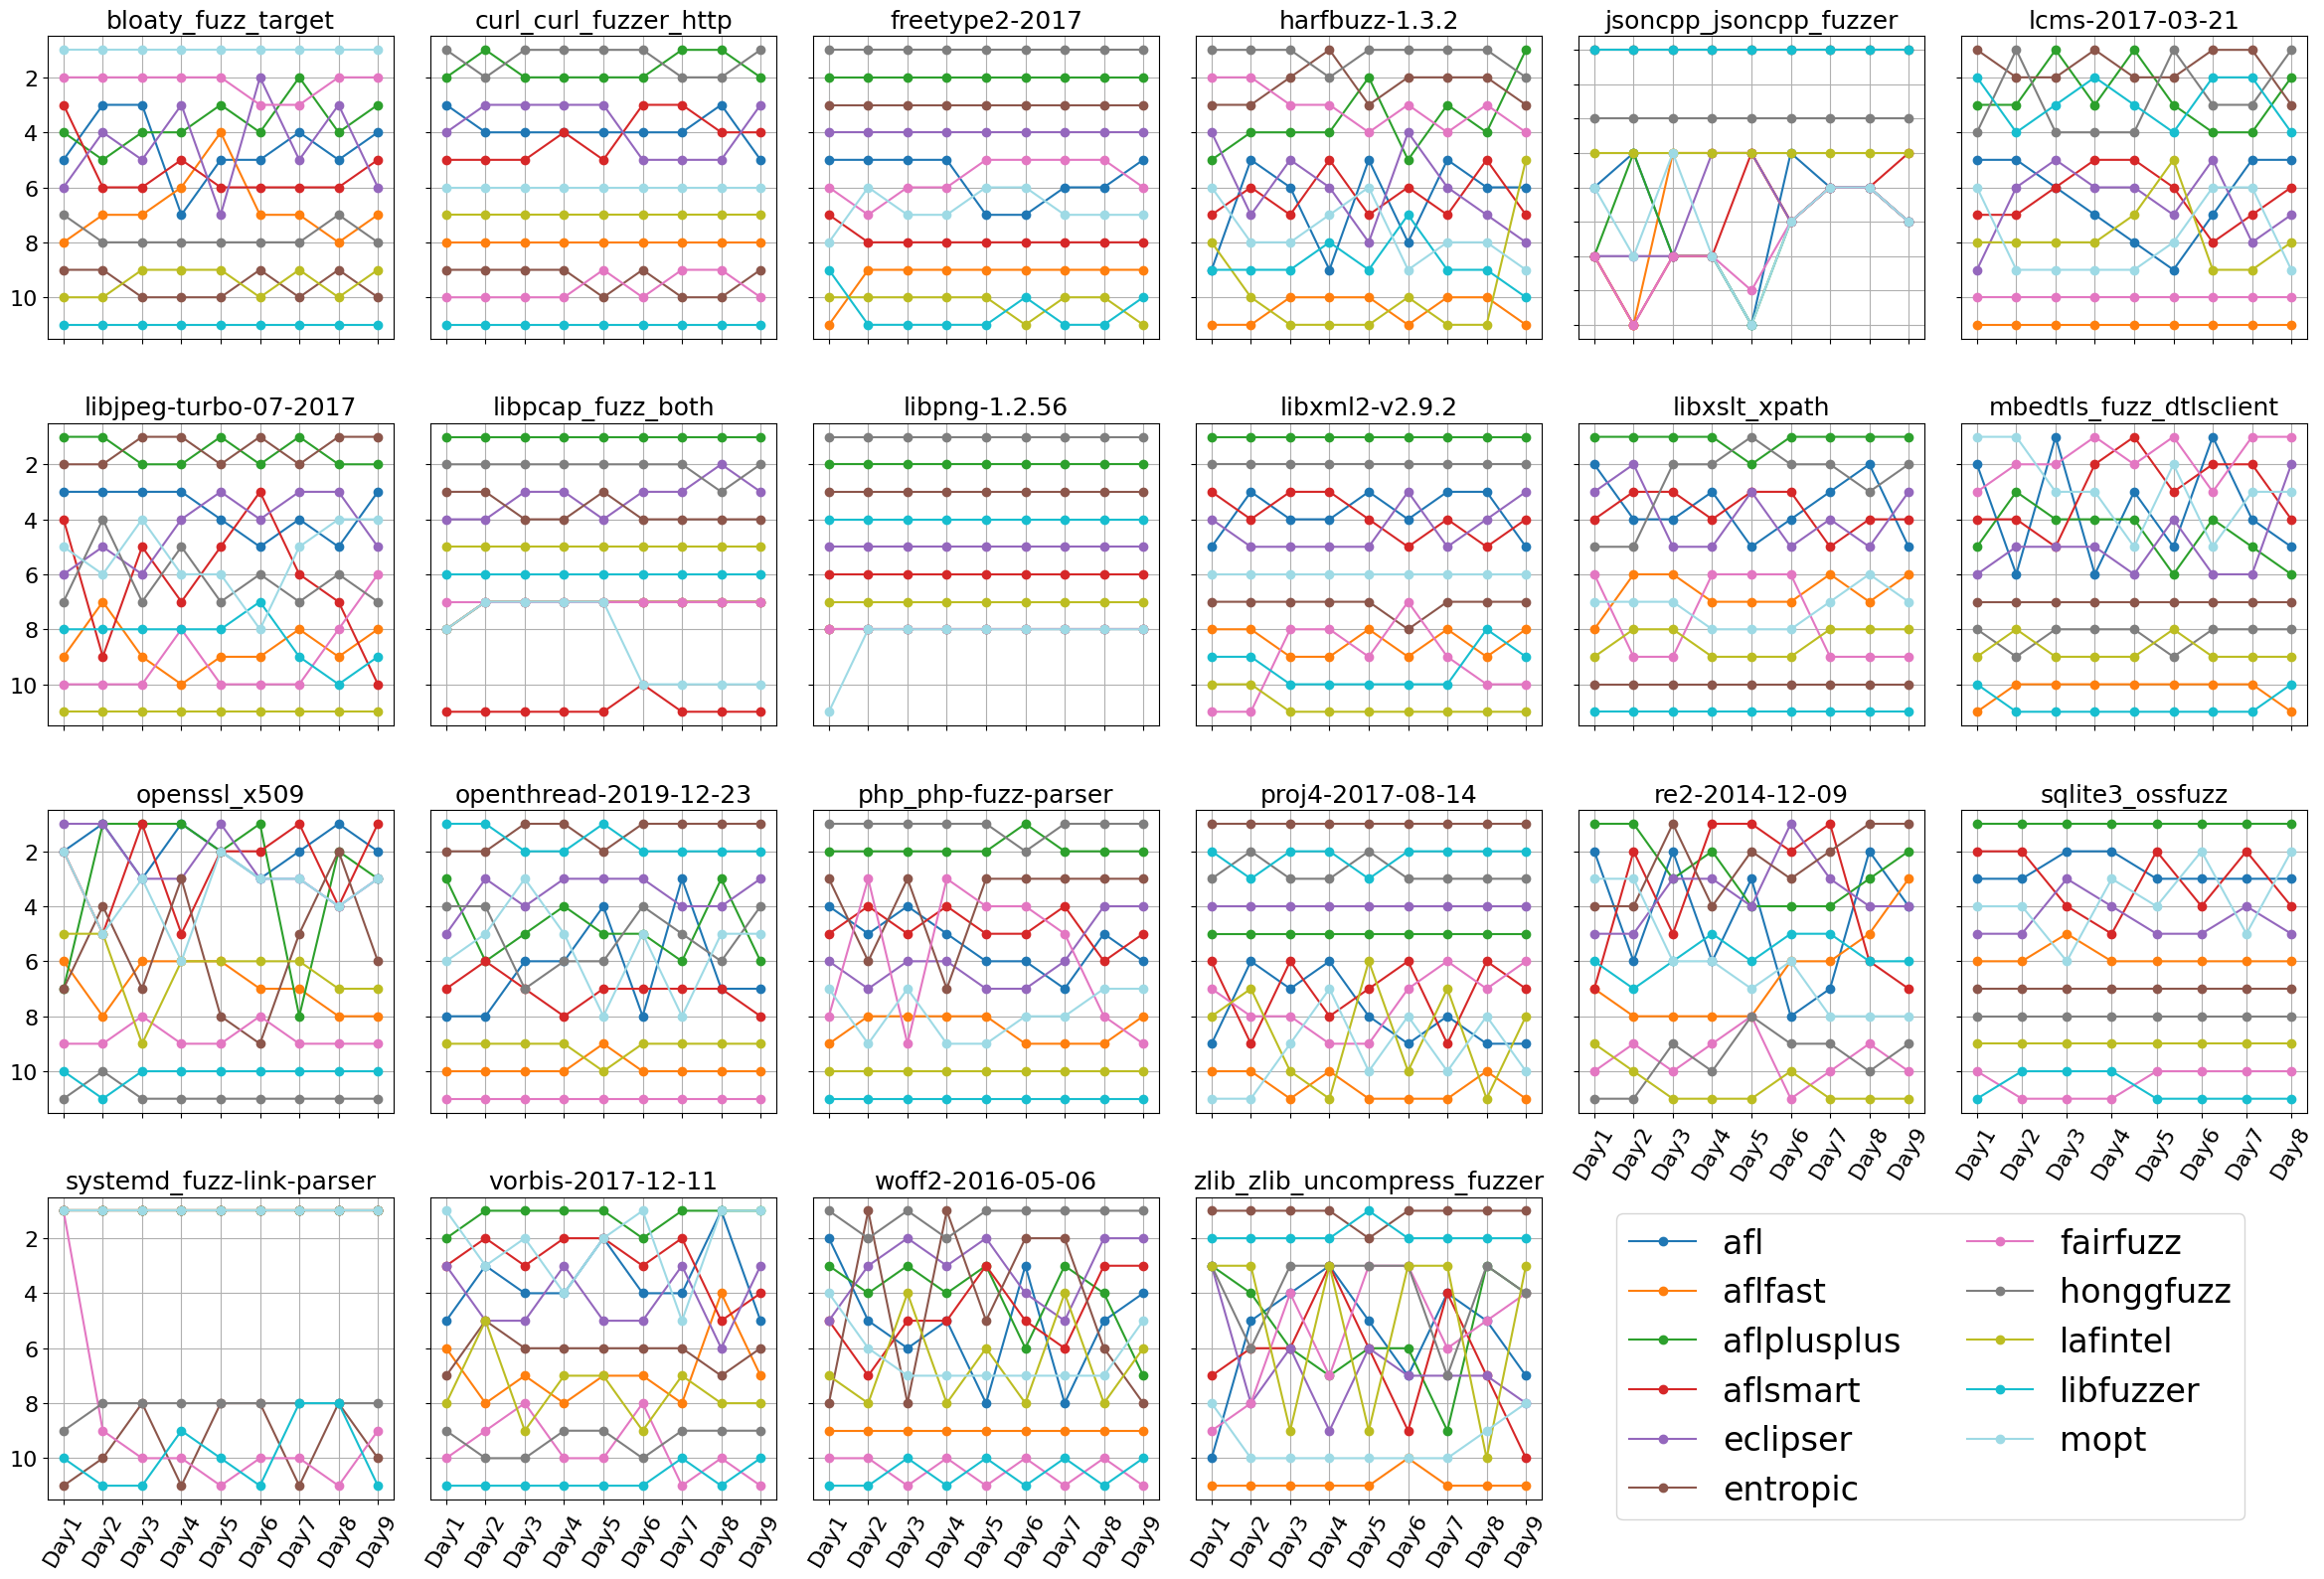

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create color map
colors = plt.cm.tab20(np.linspace(0, 1, len(all_fuzzers)))
color_map = dict(zip(all_fuzzers, colors))

# Set up the subplot grid
fig, axes = plt.subplots(4, 6, figsize=(24, 16))  # adjust figsize as needed
axes = axes.flatten()  # Make it easy to index axes in a loop

for i, target in enumerate(all_targets):
    ax = axes[i]
    selected = df[df["benchmark"] == target]
    
    median_edges = (
        selected.groupby(['experiment', 'fuzzer'])['edges_covered']
        .median()
        .reset_index()
        .rename(columns={'edges_covered': 'median_edges_covered'})
    )
    median_edges['rank'] = (
        median_edges.groupby('experiment')['median_edges_covered']
        .rank(ascending=False, method='min')
    )
    median_edges_sorted = median_edges.sort_values('experiment')

    # Create mapping from experiment to Day label
    experiments = median_edges_sorted['experiment'].unique()
    # Only set x-tick labels for the first six graphs
    experiment_labels = {exp: f"Day{i+1}" for i, exp in enumerate(sorted(experiments))}
    
    for fuzzer in median_edges_sorted['fuzzer'].unique():
        subset = median_edges_sorted[median_edges_sorted['fuzzer'] == fuzzer]
        x_vals = subset['experiment'].map(experiment_labels)
        ax.plot(x_vals, subset['rank'], marker='o', label=fuzzer,
                color=color_map[fuzzer])
    ax.set_title(target, fontsize=18)
    
    # ax.set_xlabel("Experiment")
    # ax.set_ylabel("Rank")
    # ax.set_yticklabels(list(range(1,12)), fontsize=16)

    if i > 15:
        ax.tick_params(axis='x', rotation=60, labelsize=16)
    else:
        ax.set_xticklabels([])

    if i % 6 == 0:
        ax.set_yticklabels([0,2,4,6,8,10], fontsize = 16)
    else:
        ax.set_yticklabels([])

    ax.invert_yaxis()
    ax.grid(True)

# Remove unused subplots if any
for j in range(len(all_targets), len(axes)):
    fig.delaxes(axes[j])

# Add legend outside the grid
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels,  loc='lower right', fontsize=24, ncol = 2, bbox_to_anchor=(0.95, 0.03), bbox_transform=fig.transFigure )
plt.tight_layout(rect=[0, 0, 0.98, 1])  # Leave space for the legend
plt.savefig("havoc.pdf")